## First CNN in Keras

Create a model based on the `MINIST` dataset of Handwrittent Digits. 

### Loading data

In [1]:
from keras.datasets import mnist

# split data into train , test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### Check the size and dimenios

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

### Let's take a look at some of images

In [6]:
import matplotlib.pyplot as plt

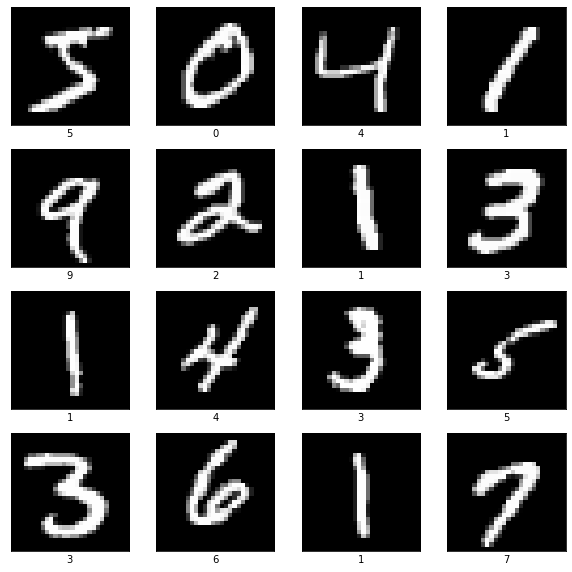

In [7]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(y_train[i])
plt.show()

### Prepare data  for training

In [8]:
# number of rows and col
img_rows = x_train[0].shape[0]
img_col = x_train[1].shape[0]

# Change the shape of images
x_train = x_train.reshape(x_train.shape[0],img_rows,img_col,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_col,1)

# shape of single image
input_shape = (img_rows,img_col,1)

In [9]:
# change the data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data by changing the range from (0-255) to (0-1)
x_train = x_train/255
x_test = x_test/255

### Hot one encoding

In [10]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build the model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D ,MaxPooling2D
from keras import backend as k
from keras.optimizers import SGD

# Create a model
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation ='relu', 
                 input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer = SGD(0.01),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

### Train model

In [13]:
# batch_size
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.5611 - accuracy: 0.8263 - val_loss: 0.1977 - val_accuracy: 0.9415
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2877 - accuracy: 0.9144 - val_loss: 0.1400 - val_accuracy: 0.9568
Epoch 3/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2195 - accuracy: 0.9349 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1812 - accuracy: 0.9449 - val_loss: 0.0875 - val_accuracy: 0.9730
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1504 - accuracy: 0.9543 - val_loss: 0.0788 - val_accuracy: 0.9754
Epoch 6/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1327 - accuracy: 0.9610 - val_loss: 0.0669 - val_accuracy: 0.9788
Epoch 7/10
60000/60000 [==============================] - 98s 2ms/st

### Save model

In [14]:
# saving a model
model.save("mnist.h5")